In [1]:
import h5py

with h5py.File('O16_run160.h5', 'r') as file:
    def print_structure(item, indent='', count=[0]):
        if count[0] >= 10:
            return
        if isinstance(item, h5py.Dataset):
            print(indent + item.name + ': Dataset, shape=' + str(item.shape) + ', dtype=' + str(item.dtype))
            count[0] += 1
        elif isinstance(item, h5py.Group):
            print(indent + item.name + ': Group')
            for subitem in item.values():
                print_structure(subitem, indent + '  ')
    
    # Print the structure of the file
    print_structure(file)



/: Group
  /Event_[0]: Dataset, shape=(542,), dtype={'names': ['x', 'y', 'z', 't', 'A', 'trackID', 'pointIDMC', 'energyMC', 'elossMC', 'angleMC', 'AMC', 'ZMC'], 'formats': ['<f8', '<f8', '<f8', '<i4', '<f8', '<i4', '<i4', '<f8', '<f8', '<f8', '<i4', '<i4'], 'offsets': [0, 8, 16, 24, 32, 40, 44, 56, 64, 72, 80, 84], 'itemsize': 88}
  /Event_[10000]: Dataset, shape=(44,), dtype={'names': ['x', 'y', 'z', 't', 'A', 'trackID', 'pointIDMC', 'energyMC', 'elossMC', 'angleMC', 'AMC', 'ZMC'], 'formats': ['<f8', '<f8', '<f8', '<i4', '<f8', '<i4', '<i4', '<f8', '<f8', '<f8', '<i4', '<i4'], 'offsets': [0, 8, 16, 24, 32, 40, 44, 56, 64, 72, 80, 84], 'itemsize': 88}
  /Event_[10001]: Dataset, shape=(253,), dtype={'names': ['x', 'y', 'z', 't', 'A', 'trackID', 'pointIDMC', 'energyMC', 'elossMC', 'angleMC', 'AMC', 'ZMC'], 'formats': ['<f8', '<f8', '<f8', '<i4', '<f8', '<i4', '<i4', '<f8', '<f8', '<f8', '<i4', '<i4'], 'offsets': [0, 8, 16, 24, 32, 40, 44, 56, 64, 72, 80, 84], 'itemsize': 88}
  /Event_[10

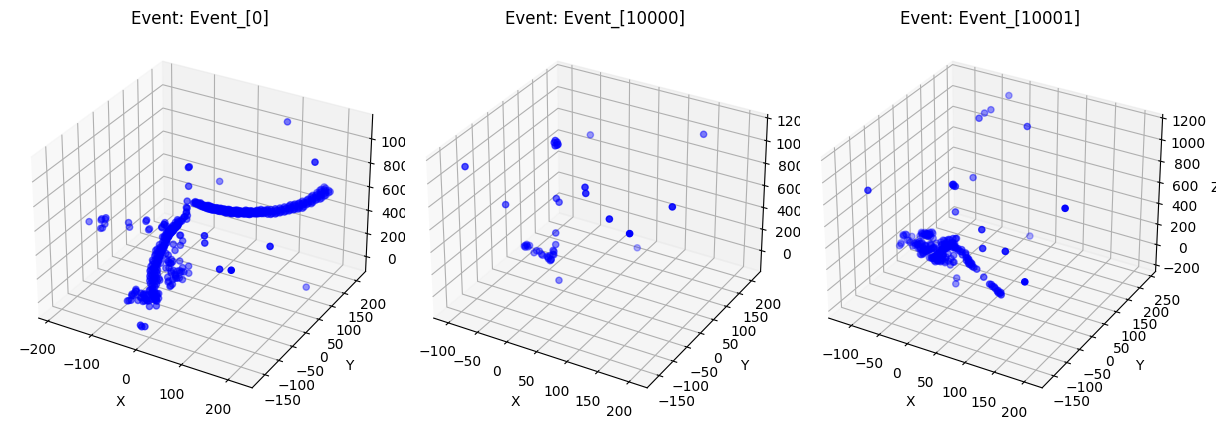

In [2]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Number of events to plot
num_events = 3

# Open the HDF5 file
with h5py.File('O16_run160.h5', 'r') as file:
    # Initialize a figure
    fig = plt.figure(figsize=(12, 8))
    
    for i, (event_name, event_data) in enumerate(file.items()):
        if i >= num_events:
            break
        
        # Extract x, y, and z coordinates
        x = event_data['x'][:]
        y = event_data['y'][:]
        z = event_data['z'][:]
        
        # Create a 3D scatter plot
        ax = fig.add_subplot(1, num_events, i + 1, projection='3d')
        ax.scatter(x, y, z, c='b', marker='o')
        ax.set_title(f'Event: {event_name}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
    plt.tight_layout()
    plt.show()


In [6]:
import numpy as np

data = np.load('O16_w_event_keys.npy', mmap_mode='r')

print(f'Shape of the array: {data.shape}')
print(f'Data type of the array: {data.dtype}')

if len(data.shape) == 2:
    print(data[:5])
else:
    print(data[:10])



Shape of the array: (60796, 4161, 6)
Data type of the array: float64
[[[-2.94494133e+01 -7.93117218e+01 -1.61600000e+01  8.00000000e+01
    3.70330000e+03  0.00000000e+00]
  [-1.96329422e+01 -9.63143463e+01 -7.80800000e+00  8.30000000e+01
    1.98500000e+02  0.00000000e+00]
  [-2.94494133e+01 -8.22132263e+01 -7.80800000e+00  8.30000000e+01
    3.57105000e+03  0.00000000e+00]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[ 4.90823441e+01  1.64392578e+02 -1.52576000e+02  3.10000000e+01
    3.36500000e+01  1.00000000e+00]
  [-7.36236525e+00 -1.45075214e+00 -8.57600000e+01  5.50000000e+01
    5.28500000e+01  1.00000000e+00]
  [-2.20870647e+01 -1.45075214e+00  5.34400000e+01  1.05000000e+02
    3.72190000e+03  1.00000000e+

In [9]:
data[0]

memmap([[ -29.4494133 ,  -79.3117218 ,  -16.16      ,   80.        ,
         3703.3       ,    0.        ],
        [ -19.6329422 ,  -96.31434631,   -7.808     ,   83.        ,
          198.5       ,    0.        ],
        [ -29.4494133 ,  -82.21322632,   -7.808     ,   83.        ,
         3571.05      ,    0.        ],
        ...,
        [   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ]])

In [10]:
for row in data[0]:
    print(row)


[ -29.4494133  -79.3117218  -16.16        80.        3703.3
    0.       ]
[-19.6329422  -96.31434631  -7.808       83.         198.5
   0.        ]
[ -29.4494133   -82.21322632   -7.808        83.         3571.05
    0.        ]
[ 7.62939453e-06 -1.64392578e+02 -7.80800000e+00  8.30000000e+01
  7.09000000e+01  0.00000000e+00]
[ -31.90353012  -77.96257019   -7.808        83.         3813.25
    0.        ]
[ -29.44940948 -104.8156662    -5.024        84.          208.1
    0.        ]
[  -9.81647491 -164.39257812   -5.024        84.           84.2
    0.        ]
[  -4.90824175 -167.36181641   -5.024        84.          883.3
    0.        ]
[-29.4494133  -73.71191406  -5.024       84.         193.5
   0.        ]
[-3.43576469e+01 -7.93117218e+01  5.44000000e-01  8.60000000e+01
  3.40525000e+03  0.00000000e+00]
[-3.19035263e+01 -8.35623779e+01  5.44000000e-01  8.60000000e+01
  6.17750000e+02  0.00000000e+00]
[-46.62824249 -92.06369019   8.896       89.         815.05
   0.        ]
[ -